In [321]:
import numpy as np 
import pandas as pd


In [322]:
df=pd.read_csv('mail_data.csv')


In [323]:
df.sample()

,Category,Message
879,spam,U have a secret admirer who is looking 2 make ...


In [324]:
df.shape


(5572, 2)

In [325]:
#DATA CLEANING 

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [327]:
df.rename(columns={'Column':'Category','Non-Null':'text'},inplace=True)

In [328]:
df.sample(5)

,Category,Message
5512,ham,"Just making dinner, you ?"
1921,ham,Dont know you bring some food
5526,spam,PRIVATE! Your 2003 Account Statement for shows...
2350,ham,Yar else i'll thk of all sorts of funny things.
4792,ham,Send me your resume:-)


In [329]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [330]:
df['Category']=encoder.fit_transform(df['Category'])

In [331]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [332]:
df.sample()

,Category,Message
467,0,They don't put that stuff on the roads to keep...


In [333]:
df.isnull().sum

<bound method DataFrame.sum of       Category  Message
0        False    False
1        False    False
2        False    False
3        False    False
4        False    False
...        ...      ...
5567     False    False
5568     False    False
5569     False    False
5570     False    False
5571     False    False

[5572 rows x 2 columns]>

In [334]:
df.duplicated().sum()

415

In [335]:
df=df.drop_duplicates(keep='first')

In [336]:
df.shape

(5157, 2)

In [337]:
##EDA(DATA ANALYSIS SEEING HOW MANY spam or harm mails are  there)

In [338]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [339]:

df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

AttributeError: 'DataFrame' object has no attribute 'show'

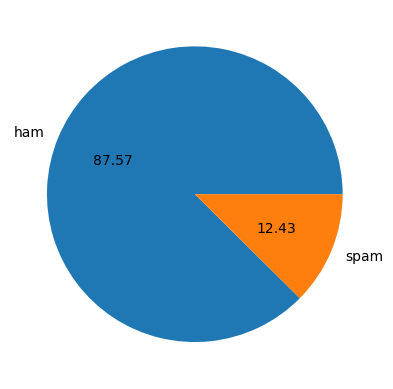

In [340]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
df.show()


In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

In [ ]:
df['num_characters']=df['Message'].apply(len) 

In [ ]:
df.head() # here in num_characters it stored the length (number  of )of characters of  messages

In [ ]:
# import nltk
# nltk.download('punkt_tab')


In [ ]:
df['num_word']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()


In [ ]:
df['num_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

In [ ]:
df[['num_characters','num_word','num_sentences']].describe()

In [ ]:
#harm
df[df['Category']==0][['num_characters','num_word','num_sentences']].describe()

In [ ]:
##spam
df[df['Category']==1][['num_characters','num_word','num_sentences']].describe()

In [ ]:
#harm
df[df['Category'] == 0][['num_characters','num_word','num_sentences']].describe()

In [ ]:
import seaborn as sns

In [ ]:
# sns.histplot(df[df['Category']==0]['num_characters'])
# sns.histplot(df[df['Category']==1]['num_characters'],color='red')
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['num_characters'])
sns.histplot(df[df['Category'] == 1]['num_characters'],color='red')

In [ ]:
sns.pairplot(df,hue='Category')

In [ ]:
# print(df.dtypes)  # Check data types of all columns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['num_word'])
sns.histplot(df[df['Category'] == 1]['num_word'],color='red')

In [ ]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(df_numeric.corr(),annot=True)


In [ ]:
##DATA PROCESSING (## Removing punctuation marks,unwanted words etc which are unnecasry and part of sma messgaes))

In [ ]:
def transform_text(Message):
    Message = Message.lower()
    Message = nltk.word_tokenize(Message)
    
    y = []
    for i in  Message:
        if i.isalnum():
            y.append(i)
    
    Message = y[:]
    y.clear()
    
    for i in  Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)    
    Message = y[:]
    y.clear()
    
    for i in Message:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

from nltk.stem.porter import PorterStemmer

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("loving")

In [ ]:
import string
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')


In [ ]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [ ]:
df.head()

In [ ]:
df.head()

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [ ]:
spam_wc = wc.generate(df[df['Category'] == 1]['transformed_text'].str.cat(sep=" "))


In [ ]:

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
# !pip install wordcloud


In [ ]:
# from wordcloud import WordCloud
# wc=WordCloud(width=50,height=50,min_font_size=10,background_color='white')

In [ ]:
ham_wc=wc.generate(df[df['Category']==0]['transformed_text'].str.cat(sep=""))

In [ ]:
# from nltk.corpus import stopwords

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)


In [ ]:

spam_corpus = []
for msg in df[df['Category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)



In [ ]:

len(spam_corpus)

In [ ]:

# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# sns.barplot(x='word', y='count', data=top_words)
# plt.xticks(rotation='vertical')
# plt.show()
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame from the most common 30 words
top_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot using seaborn with keyword arguments
sns.barplot(x='word', y='count', data=top_words)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:

ham_corpus = []
for msg in df[df['Category'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

In [ ]:
df.head()

In [ ]:
#4.MODEL BUILDING

In [ ]:

# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
# pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))

# # ✅ Save trained model
# pickle.dump(model, open('model .pkl', 'wb'))

In [ ]:

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:

X.shape

In [ ]:

y = df['Category'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [ ]:

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier



In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [ ]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:

train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:

performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:

new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
mnb.fit(X, df['Category'])
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier


In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
# pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
# pickle.dump(final_estimator, open('model .pkl', 'wb'))

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [ ]:
clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [347]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))